## Assume you are appointed as a Data scientist in any international humanitarian NGO, after the recent funding programmes, have been able to raise around 120 million. Now the CEO of the NGO call you to choose how to use this money strategically and effectively. The significant issues that comes while making this conclusion are mostly related to choosing the countries that are in the direst need of aid. Your job is to classify the countries using some socio-economic and health factors that determine the overall development of the country. Then you need to suggest the countries which the CEO needs to focus on the most.

### Apply Principal component analysis, K-Means Clustering, Hierarchical Clustering.

In [1]:
import warnings
warnings.filterwarnings("ignore")
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df=pd.read_csv(r'C:\Users\chait\Downloads\Country-data.csv')
df.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200


## Description of Column Names	

###### 1.	country: Name of the country
###### 2.	child_mort:	Death of children under 5 years of age per 1000 live births
###### 3.	exports:	Exports of goods and services per capita. Given as %age of the GDP per capita
###### 4.	health:	Total health spending per capita. Given as %age of GDP per capita
###### 5.	imports:	Imports of goods and services per capita. Given as %age of the GDP per capita
###### 6.	Income:	Net income per person
###### 7.	Inflation:	The measurement of the annual growth rate of the Total GDP
###### 8.	life_expec:	The average number of years a new born child would live if the current mortality patterns are to remain the same
###### 9.	total_fer:	The number of children that would be born to each woman if the current age-fertility rates remain the same.
###### 10.	gdpp:	The GDP per capita. Calculated as the Total GDP divided by the total population.

## EDA (Exploratory Data Analysis)

In [3]:
# Remove the non-numerical column i.e. 'Country'

df.set_index('country',inplace=True)
df.head()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
country,,,,,,,,,
Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200


In [4]:
# Now changing per Total GDP to per Total GDPP

df['health']=(df['health']*df['gdpp'])/100
df['imports']=(df['imports']*df['gdpp'])/100
df['income']=(df['income']*df['gdpp'])/100
df.head()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
country,,,,,,,,,
Afghanistan,90.2,10.0,41.9174,248.297,8903.3,9.44,56.2,5.82,553
Albania,16.6,28.0,267.8950,1987.740,406137.0,4.49,76.3,1.65,4090
Algeria,27.3,38.4,185.9820,1400.440,575340.0,16.10,76.5,2.89,4460
Angola,119.0,62.3,100.6050,1514.370,208270.0,22.40,60.1,6.16,3530
Antigua and Barbuda,10.3,45.5,735.6600,7185.800,2330200.0,1.44,76.8,2.13,12200


In [5]:
# checking for null values

df.isnull().sum()

child_mort    0
exports       0
health        0
imports       0
income        0
inflation     0
life_expec    0
total_fer     0
gdpp          0
dtype: int64

In [6]:
# checking for duplicated values

df.duplicated().sum()

0

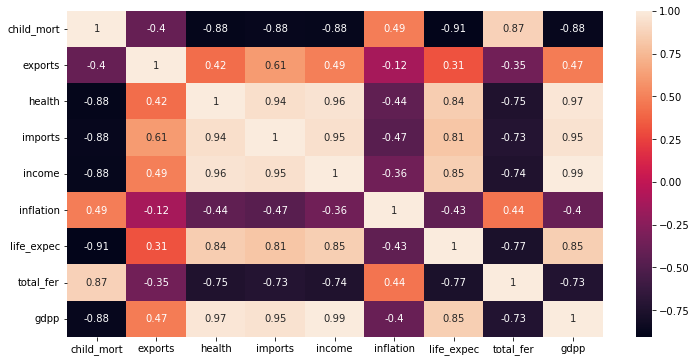

In [7]:
# Heatmap plotting

plt.figure(figsize=(12,6))
sns.heatmap(df.corr(method='spearman'),annot=True)   
plt.show()

### From the above heatmap, we can see that there are some variables having very high correlation with repect to postive and negative.

###### This will cause problem for the upcoming analysis, hence need to be removed but they have valuable information which we can't afford to loose. So, we will use PCA to overcome this multicollinearity. This will not only take care of multicollinearity but also will preserve the valuable information and also dimensionality reduction.



In [8]:
# Importing the scaling library - StandardScaler

from sklearn.preprocessing import StandardScaler

scaler=StandardScaler()

In [9]:
# Scaling the dataset with Standard Scaler 

scaled_df=scaler.fit_transform(df)
scaled_df=pd.DataFrame(scaled_df,columns=df.columns)
scaled_df.head()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,1.291532,-1.138280,-0.565040,-0.432276,-0.419624,0.157336,-1.619092,1.902882,-0.679180
1,-0.538949,-0.479658,-0.439218,-0.313677,-0.388521,-0.312347,0.647866,-0.859973,-0.485623
2,-0.272833,-0.099122,-0.484826,-0.353720,-0.375272,0.789274,0.670423,-0.038404,-0.465376
3,2.007808,0.775381,-0.532363,-0.345953,-0.404013,1.387054,-1.179234,2.128151,-0.516268
4,-0.695634,0.160668,-0.178771,0.040735,-0.237868,-0.601749,0.704258,-0.541946,-0.041817


## Applying PCA

In [10]:
# Importing PCA module

from sklearn.decomposition import PCA
pca=PCA(svd_solver='randomized',random_state=42) 
pca.fit(scaled_df)  

PCA(random_state=42, svd_solver='randomized')

In [11]:
# Let's plot the first two principal components on x-y axes and try to understand the feature sense
# Defining the components in a new dataframe

col_names=list(scaled_df.columns)
pca_df=pd.DataFrame({'PC1': pca.components_[0],'PC2':pca.components_[1], 'Feature':col_names})
pca_df

,PC1,PC2,Feature
0,-0.335127,0.471890,child_mort
1,0.260650,0.196891,exports
2,0.369411,0.174463,health
3,0.356568,0.363929,imports
4,0.361927,0.364126,income
5,-0.156522,0.221155,inflation
6,0.359927,-0.364183,life_expec
7,-0.320553,0.458034,total_fer
8,0.410310,0.227489,gdpp


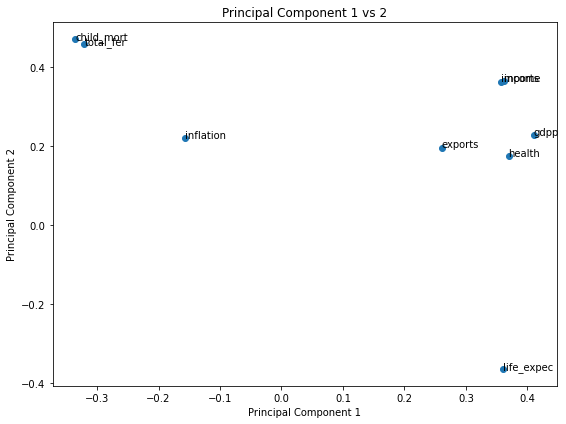

In [12]:
# plotting the two principal components in scatter plot

fig=plt.figure(figsize=(8,6))                 
plt.scatter(pca_df.PC1,pca_df.PC2)            
plt.title('Principal Component 1 vs 2')      
plt.xlabel('Principal Component 1')           
plt.ylabel('Principal Component 2')   


# setting the features name on the datapoints

for i, txt in enumerate(pca_df.Feature):
    plt.annotate(txt,(pca_df.PC1[i],pca_df.PC2[i]))
    
plt.tight_layout()  
plt.show()

In [13]:
# check the variance ratio i.e VT

pca.explained_variance_ratio_   

array([0.54475534, 0.1801119 , 0.10224621, 0.09537347, 0.02540409,
       0.02425824, 0.01643517, 0.00943709, 0.0019785 ])

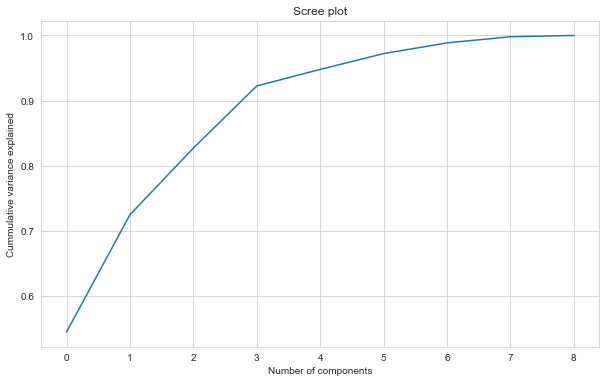

In [14]:
# Screeplot - plotting for cummulative explained_variance_ratio against number of components

sns.set_style('whitegrid')
plt.figure(figsize=(10,6))

# plotting using cumsum
plt.plot(np.cumsum(pca.explained_variance_ratio_))    

plt.title('Scree plot')
plt.xlabel('Number of components')
plt.ylabel('Cummulative variance explained')

plt.show()

#### From the above screeplot, we can conclude that number of components 5 is best to choose as it is having 97 percent approximately cummulative variance. Which means by choosing 6 we can explain 97% approx of variance.

## Outliers Analysis

In [15]:
round(scaled_df.describe(percentiles=[0.15,0.35,0.55,0.75,0.95]),2)   # creating percentile to check outliers

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
count,167.00,167.00,167.00,167.00,167.00,167.00,167.00,167.00,167.00
mean,-0.00,0.00,-0.00,0.00,-0.00,0.00,0.00,0.00,0.00
std,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00
min,-0.89,-1.50,-0.58,-0.45,-0.42,-1.14,-4.34,-1.19,-0.70
15%,-0.83,-0.80,-0.56,-0.43,-0.42,-0.64,-1.15,-0.93,-0.67
35%,-0.66,-0.48,-0.51,-0.37,-0.41,-0.46,-0.23,-0.64,-0.55
50%,-0.47,-0.22,-0.41,-0.31,-0.38,-0.23,0.29,-0.36,-0.45
55%,-0.35,-0.10,-0.38,-0.29,-0.37,-0.17,0.38,-0.23,-0.38
75%,0.59,0.37,-0.04,0.08,-0.18,0.28,0.70,0.62,0.06
95%,1.93,1.44,2.18,1.20,1.43,1.24,1.22,1.93,1.95


### As we can see from the above table, all columns are having outliers.

##### Let's now visualize the dataset to understand the outliers in better way. We will create boxplots for each one of them



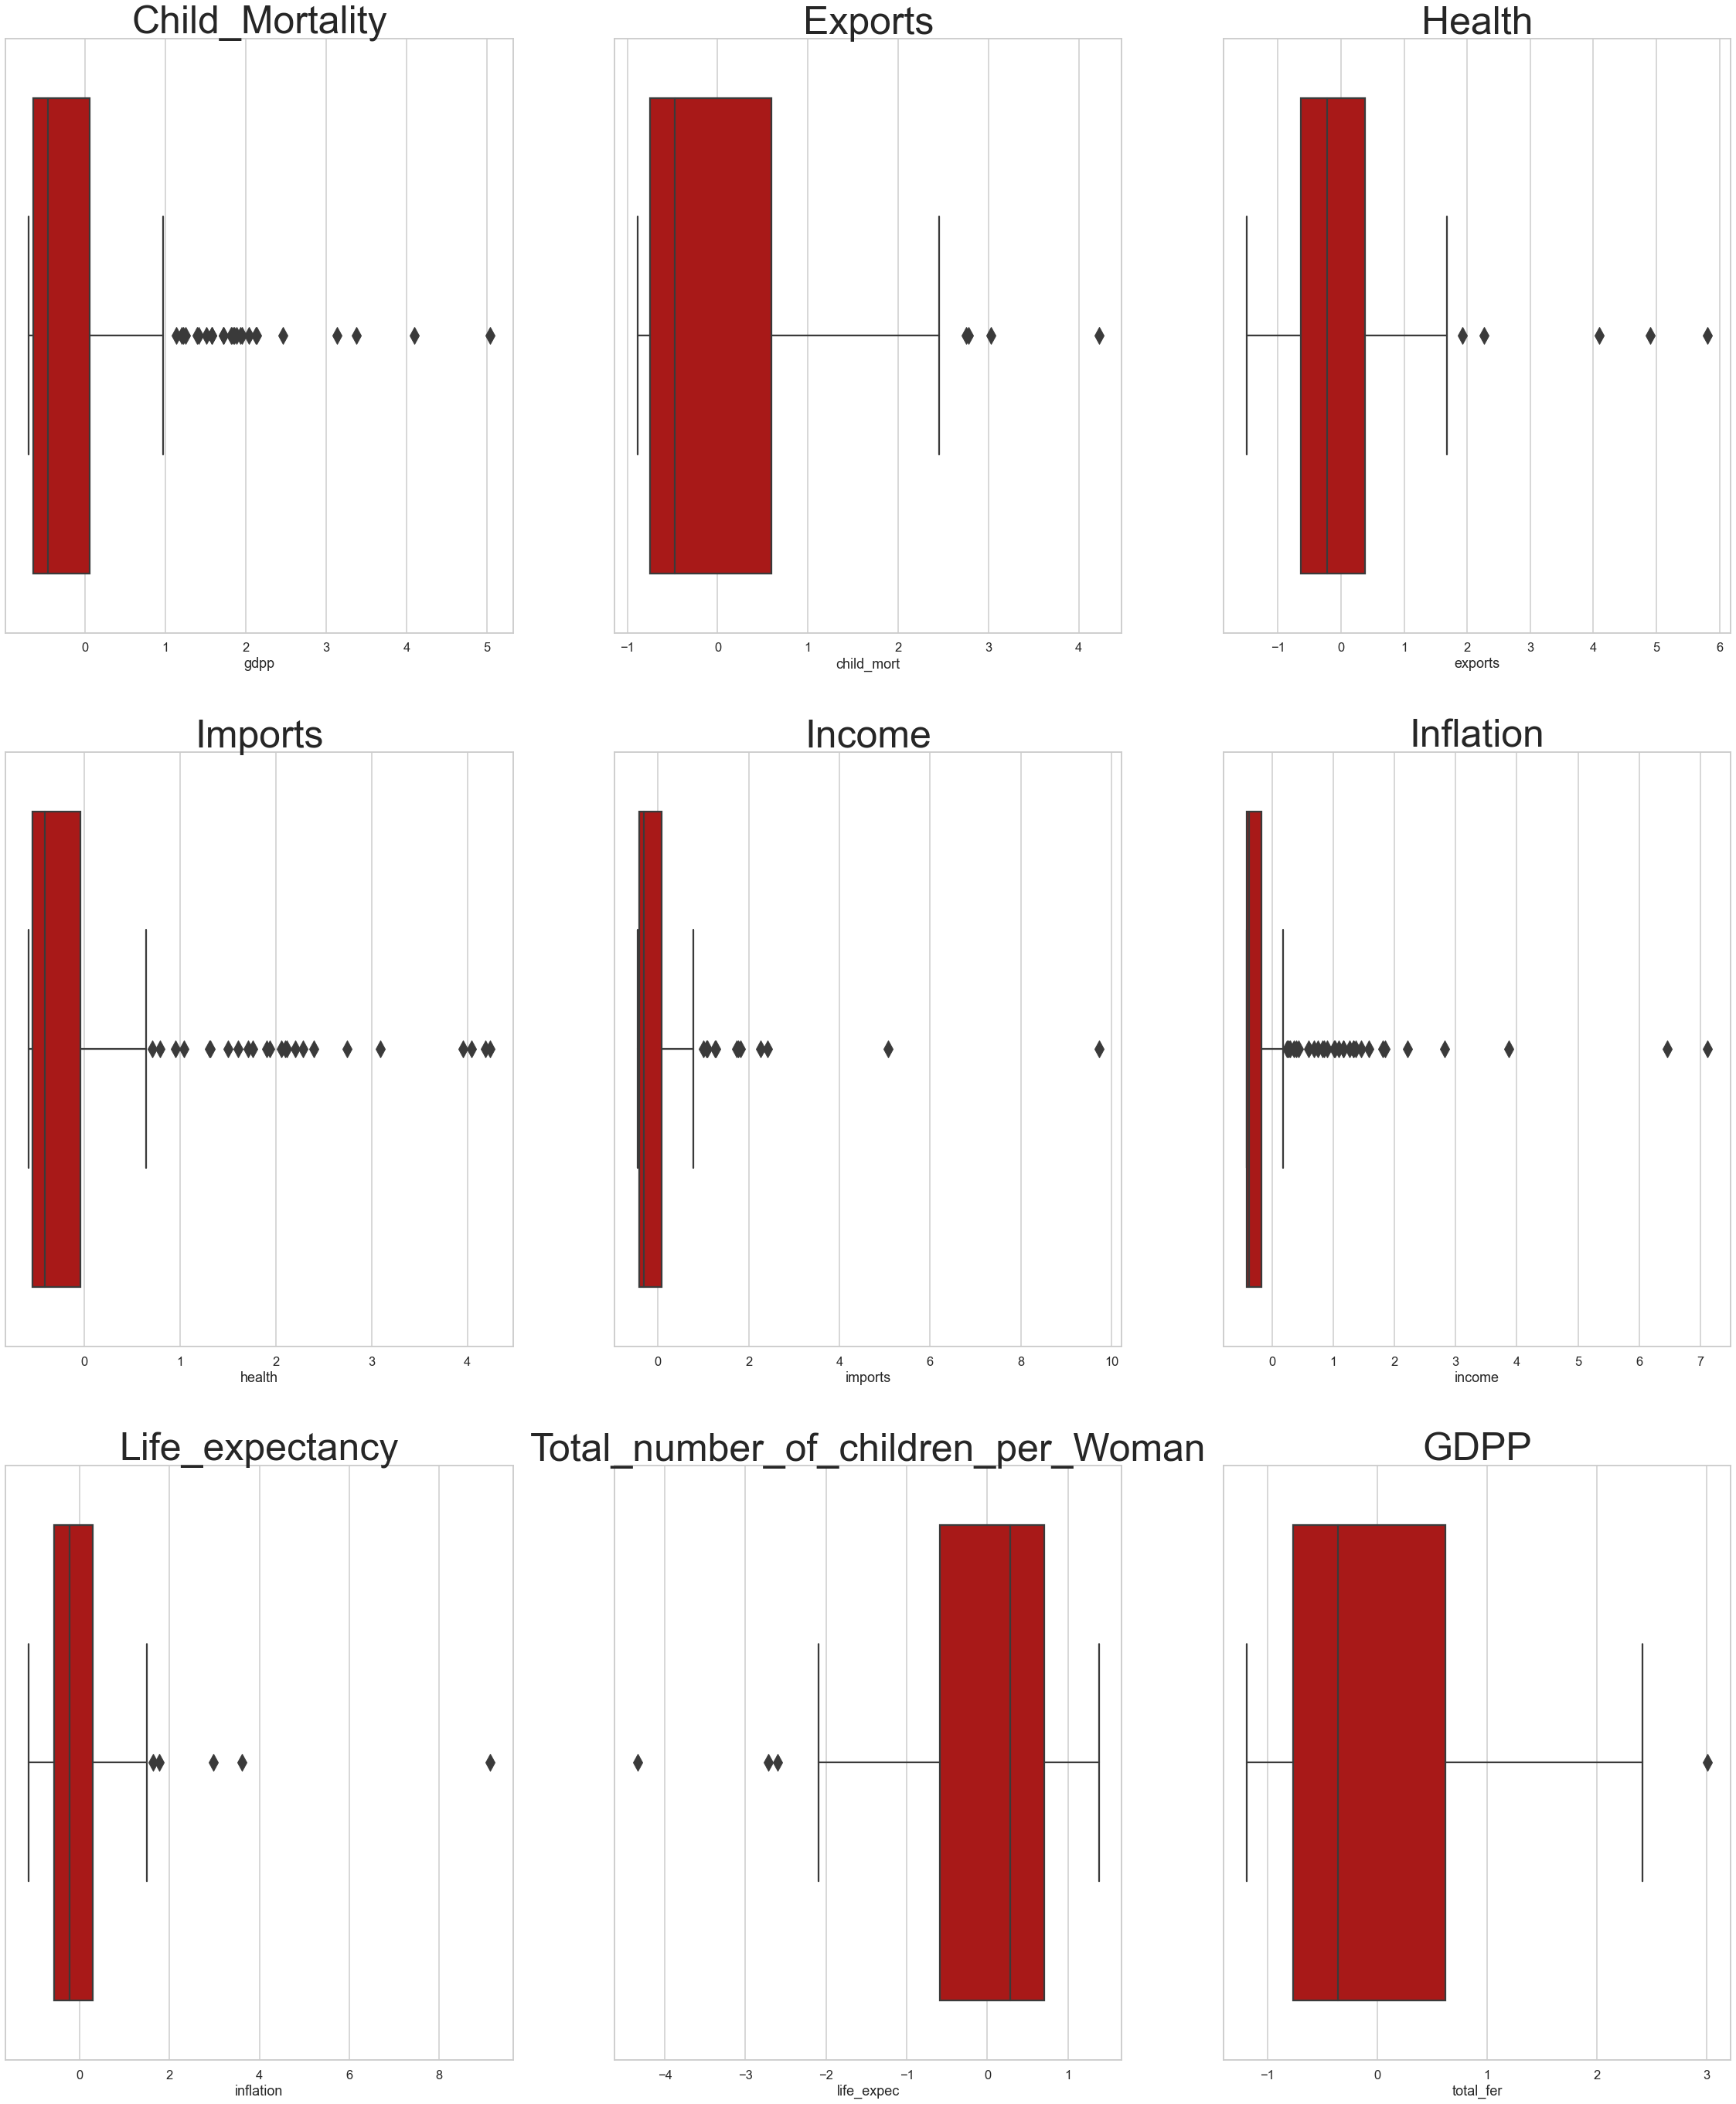

In [16]:
# Setting size of figure, context and gridlines

plt.figure(figsize=(40,150))
plt.tight_layout()
sns.set_style('whitegrid')
sns.set_context('talk')

# Title names for the columns in the dataset

col={0:'Child_Mortality',1:'Exports',2:'Health',3:'Imports',4:'Income',5:'Inflation',
     6:'Life_expectancy',7:'Total_number_of_children_per_Woman',8:'GDPP'}

# Visualising the outliers with boxplot for all the variables 

for i in range(9):
    plt.subplot(9,3,i+1)
    plt.title(col[i],fontsize=50)
    sns.boxplot(x=scaled_df.columns[i-1],data=scaled_df,palette='gist_heat',orient='v',fliersize=15)  # using boxplot
        



#### From the above boxplot, we can conclude that all the variables/components are having outliers. So, from here we can make a decision that either to keep the outliers or to remove them.

###### We will use both approach and compare both of the results :
###### First, we will include outliers and do clustering
###### Second, we will trim the outliers and do clustering

# Approach 1 : Including Outliers

## K-Means Clustering using PCA

In [17]:
# Importing incremeantal PCA for efficiency

from sklearn.decomposition import IncrementalPCA

# Chossing k=5 as it explains about 97% of variance - visualized from screeplot

pca_final=IncrementalPCA(n_components=5)

In [18]:
# Transformation - getting data on principal components

pca_scaled_df=pca_final.fit_transform(scaled_df)

pca_scaled_df.shape 

(167, 5)

<AxesSubplot:title={'center':'Correlation of the variables after PCA - countries'}>

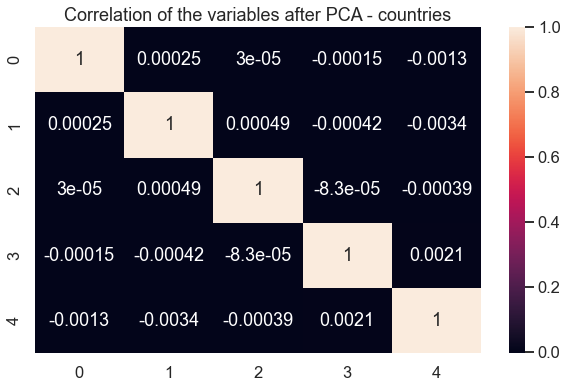

In [19]:
# Checking the correlation of the new dataset(After PCA)

corr_pca=np.corrcoef(pca_scaled_df.transpose())

# now plotting heatmap
 
plt.figure(figsize=(10,6))  
plt.title("Correlation of the variables after PCA - countries")

sns.heatmap(corr_pca,annot=True)   

In [20]:
# checking the multicollinearlity - minumum and maximum

corr_pca_minmax = corr_pca - np.diagflat(corr_pca.diagonal())

print("maximum correlation:",corr_pca_minmax.max(), ", minimum correlation: ", corr_pca_minmax.min(),)  


maximum correlation: 0.0021121426942403124 , minimum correlation:  -0.003358641482559941


In [21]:
# From above heatmap and the calculation we can now say that we have removed the multicollinearlity from our dataset

# Creating new dataframe for the new dataset with new columns names

new_dataset=pd.DataFrame(pca_scaled_df)

new_dataset=new_dataset.rename(columns={0:'PC1',1:'PC2',2:'PC3',3:'PC4',4:'PC5',5:'PC6'})

new_dataset.head()

,PC1,PC2,PC3,PC4,PC5
0,-2.740399,1.317918,-0.891229,-0.114332,0.158490
1,-0.000356,-1.491489,0.017655,0.013236,-0.216884
2,-0.436012,-0.691619,0.693945,0.701270,0.349321
3,-2.472995,2.328570,0.882692,0.099320,0.764776
4,0.641890,-1.047344,0.131177,-0.390181,0.179997


In [22]:
# importing clustering libraries

import sklearn
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

In [23]:
# Silhouette analysis


clusters_range=[2,3,4,5,6,7,8,9]                                        # selecting range of clusters
for i in clusters_range:                                               
    kmeans=KMeans(n_clusters=i,max_iter=500)                            # Using iteration 500 for finding Kmeans
    kmeans.fit(new_dataset)                                             # fitting the kmeans
    cluster_label=kmeans.labels_                                        # saving the labels in a cluster_label list
    
    silhouette_Score=silhouette_score(new_dataset,cluster_label)        # finding the silhouette score 
    
    # Printing for all number of clusters of range(2,10) for silhouette score
    
    print("For no. of cluster={0},silhouette score is {1}".format(i,silhouette_Score))    

For no. of cluster=2,silhouette score is 0.436593354493332
For no. of cluster=3,silhouette score is 0.41114240024366133
For no. of cluster=4,silhouette score is 0.4166607876891153
For no. of cluster=5,silhouette score is 0.4172362443188646
For no. of cluster=6,silhouette score is 0.4246337815058368
For no. of cluster=7,silhouette score is 0.25516852031442944
For no. of cluster=8,silhouette score is 0.25752361700610654
For no. of cluster=9,silhouette score is 0.26808351848384265


In [24]:
# Final model k=4

kmeans=KMeans(n_clusters=4,max_iter=500,random_state=42)         # k=4 and iteration=500
kmeans.fit(new_dataset)         

KMeans(max_iter=500, n_clusters=4, random_state=42)

In [25]:
# New dataset cluster labels

kmeans.labels_ 

array([1, 0, 0, 1, 0, 0, 0, 2, 2, 0, 0, 0, 0, 0, 0, 2, 0, 1, 0, 0, 0, 1,
       0, 2, 0, 1, 1, 0, 1, 2, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 2, 0,
       2, 0, 0, 0, 0, 1, 1, 0, 0, 2, 2, 1, 1, 0, 2, 1, 2, 0, 0, 1, 1, 0,
       1, 0, 2, 0, 0, 0, 1, 2, 2, 2, 0, 2, 0, 0, 1, 1, 2, 0, 1, 0, 0, 1,
       1, 0, 0, 3, 0, 1, 1, 0, 0, 1, 2, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0,
       2, 2, 1, 1, 2, 0, 1, 0, 0, 0, 0, 0, 0, 2, 0, 0, 1, 0, 0, 1, 0, 0,
       1, 3, 0, 2, 0, 1, 0, 2, 0, 0, 1, 0, 2, 2, 0, 1, 0, 1, 1, 0, 0, 0,
       0, 1, 0, 2, 2, 2, 0, 0, 0, 0, 0, 1, 1])

In [26]:
# Uploading the cluster labels in our original dataset

df['Cluster_id']=kmeans.labels_
df.head()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,Cluster_id
country,,,,,,,,,,
Afghanistan,90.2,10.0,41.9174,248.297,8903.3,9.44,56.2,5.82,553,1
Albania,16.6,28.0,267.8950,1987.740,406137.0,4.49,76.3,1.65,4090,0
Algeria,27.3,38.4,185.9820,1400.440,575340.0,16.10,76.5,2.89,4460,0
Angola,119.0,62.3,100.6050,1514.370,208270.0,22.40,60.1,6.16,3530,1
Antigua and Barbuda,10.3,45.5,735.6600,7185.800,2330200.0,1.44,76.8,2.13,12200,0


<AxesSubplot:title={'center':'Cluster level vs GDPP per capita'}, xlabel='Cluster_id', ylabel='gdpp'>

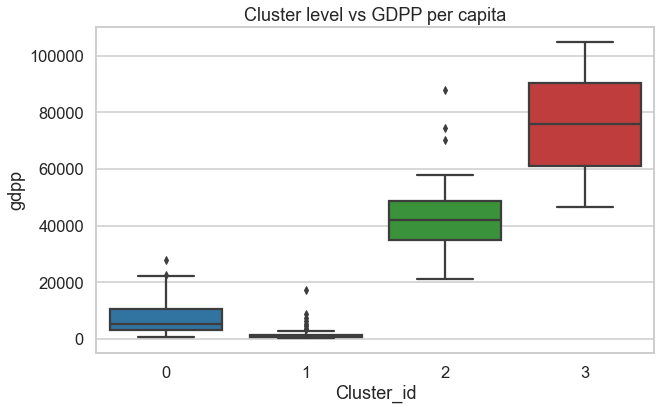

In [27]:
# Visualising the distribution of the cluster labels for column 'gdpp'

plt.figure(figsize=(10,6))
plt.title('Cluster level vs GDPP per capita')
sns.boxplot(x='Cluster_id',y='gdpp',data=df)

#### Points to be concluded from above boxplot - gdpp(The GDP per capita) visualization

###### Cluster label 0 : Most of the countries in this boxplot are having little high gdpp than the very lowest gdpp group
###### Cluster label 1 : Having very low gdpp than all the other cluster labels
###### Cluster label 2 : Having high gdpp with some outliers
###### Cluster label 3 : Having highest gdpp than all other cluster labels

<AxesSubplot:title={'center':'Cluster level vs Child Mortality'}, xlabel='Cluster_id', ylabel='child_mort'>

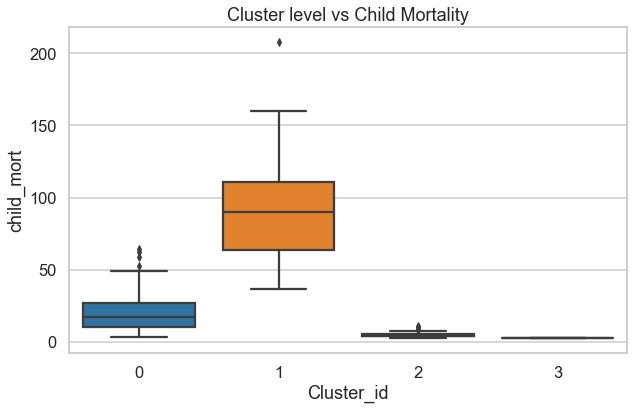

In [29]:
# Visualising the distribution of the cluster labels for column 'child_mort' using boxplot

plt.figure(figsize=(10,6))                    
plt.title('Cluster level vs Child Mortality')

sns.boxplot(x='Cluster_id',y='child_mort',data=df)  

#### Points to be concluded from above boxplot - child_mort(Death of children under 5 years of age per 1000 live births) visualization
###### Cluster label 0 : Having second highest child mortality with few outliers
###### Cluster label 1 : Having highest child mortality than rest of the cluster labels
###### Cluster label 2 : Having low child mortality with few outliers
###### Cluster label 3 : Having lowest child mortality than all other cluster labels

<AxesSubplot:title={'center':'Cluster level vs Income'}, xlabel='Cluster_id', ylabel='income'>

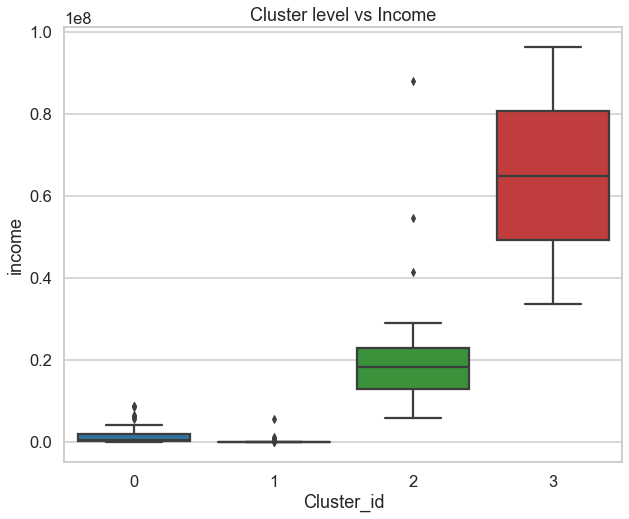

In [30]:
# Visualising the distribution of the cluster labels for column 'income'

plt.figure(figsize=(10,8))
plt.title('Cluster level vs Income')
sns.boxplot(x='Cluster_id',y='income',data=df)

#### Points to be concluded from above boxplot - income(Net income per person) visualization
###### Cluster label 0 : Having second lowest income with few outliers
###### Cluster label 1 : Having lowest income with few outliers than rest of the cluster labels
###### Cluster label 2 : Having decent income with few outliers
###### Cluster label 3 : Having highest income than all other cluster labels

## Visualisation of PC1 and PC2

In [32]:
# Data Transformation of the new_dataset

new_dataset['Cluster_label']=kmeans.labels_     
new_dataset.set_index(df.index,inplace=True)  
new_dataset.head()

,PC1,PC2,PC3,PC4,PC5,Cluster_label
country,,,,,,
Afghanistan,-2.740399,1.317918,-0.891229,-0.114332,0.158490,1
Albania,-0.000356,-1.491489,0.017655,0.013236,-0.216884,0
Algeria,-0.436012,-0.691619,0.693945,0.701270,0.349321,0
Angola,-2.472995,2.328570,0.882692,0.099320,0.764776,1
Antigua and Barbuda,0.641890,-1.047344,0.131177,-0.390181,0.179997,0


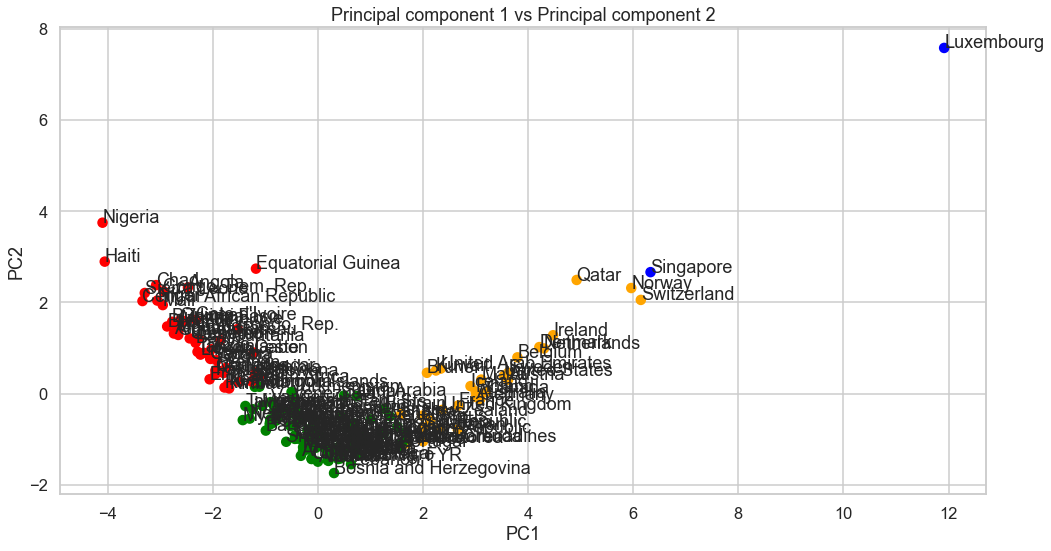

In [38]:
# Visualising the clusters formed by choosing first two pricipal components(on X-Y axes)
                
fig = plt.figure(figsize = (15,8))   
plt.title("Principal component 1 vs Principal component 2")
plt.scatter(new_dataset.iloc[:,0], new_dataset.iloc[:,1],
            c = new_dataset.Cluster_label.map({0:'green',1:'red',2:'orange',3:'blue'}))

for i, txt in enumerate(new_dataset.index):
    plt.annotate(txt, (new_dataset.PC1[i],new_dataset.PC2[i]))

plt.xlabel('PC1')
plt.ylabel('PC2')
plt.tight_layout()   
plt.show()  

###### As we can see from first two principal components(PC1 & PC2), the PC1 is in the direction where the countries need of least help. Here, why we are choosing PC1 because it has maximum percentage of variance explained.
###### We can see that countries like 'Singapore' and 'Luxembourg' are having high PC1 which means they are doing well, where on other hand countries like 'Nigeria', 'Hiti', Equatorial Guniea and close to them requires urgent need of aid.
###### Hence from the datapoints of color 'Red' are in direst need of aid than the color in 'Orange'

## Visualizing with original variables (Child_mort vs gdpp)

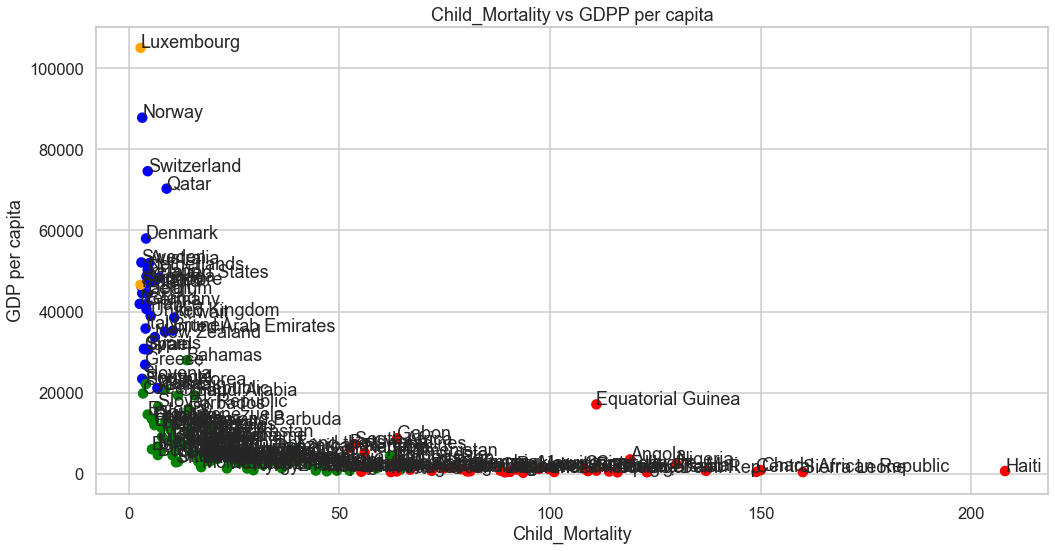

In [41]:
# Visualising the clusters formed with origibal varaibles(on X-Y axes)

fig = plt.figure(figsize = (15,8))   
plt.scatter(df['child_mort'],df['gdpp'],
            c = df.Cluster_id.map({0:'green',1:'red',2:'blue',3:'orange'}))

for i, txt in enumerate(df.index):
    plt.annotate(txt, (df.child_mort[i],df.gdpp[i]))

plt.title('Child_Mortality vs GDPP per capita')
plt.xlabel('Child_Mortality')
plt.ylabel('GDP per capita')
plt.tight_layout()  
plt.show()          

###### From the above scatter plot, Two points we can conclude :
###### Country "Haiti" is in dire need of aid
###### Country "Luxembourg" is having good gdp and less child mortality rate

## Insights (K-Means Approach 1)

In [42]:
# Finding the countries with cluster label=1

Country_help=pd.DataFrame(new_dataset[new_dataset['Cluster_label']==1].index)

Country_help.shape

(47, 1)

###### There are total 47 countries from the dataset need of urgent help/aid as they are having lowest income, high child mortality and low gdp per capita.

###### Let's Find the countries with highest income, low child mortality and high gdp per capita or the countries that doesn't need aid.

In [43]:
# Finding the countries with cluster label=3

Country_nohelp=pd.DataFrame(new_dataset[new_dataset['Cluster_label']==3].index)

Country_nohelp.shape

(2, 1)

###### Only 2 countries is there with good socio-economic and health factors

# Hierarchical Clustering

In [44]:
# Dropping the old cluster label and saving in new datset

hier_cluster=new_dataset.drop('Cluster_label',1)
hier_cluster.head()

,PC1,PC2,PC3,PC4,PC5
country,,,,,
Afghanistan,-2.740399,1.317918,-0.891229,-0.114332,0.158490
Albania,-0.000356,-1.491489,0.017655,0.013236,-0.216884
Algeria,-0.436012,-0.691619,0.693945,0.701270,0.349321
Angola,-2.472995,2.328570,0.882692,0.099320,0.764776
Antigua and Barbuda,0.641890,-1.047344,0.131177,-0.390181,0.179997


In [45]:
# Importing labraries for hierarchical clustering

from scipy.cluster.hierarchy import linkage
from scipy.cluster.hierarchy import dendrogram
from scipy.cluster.hierarchy import cut_tree

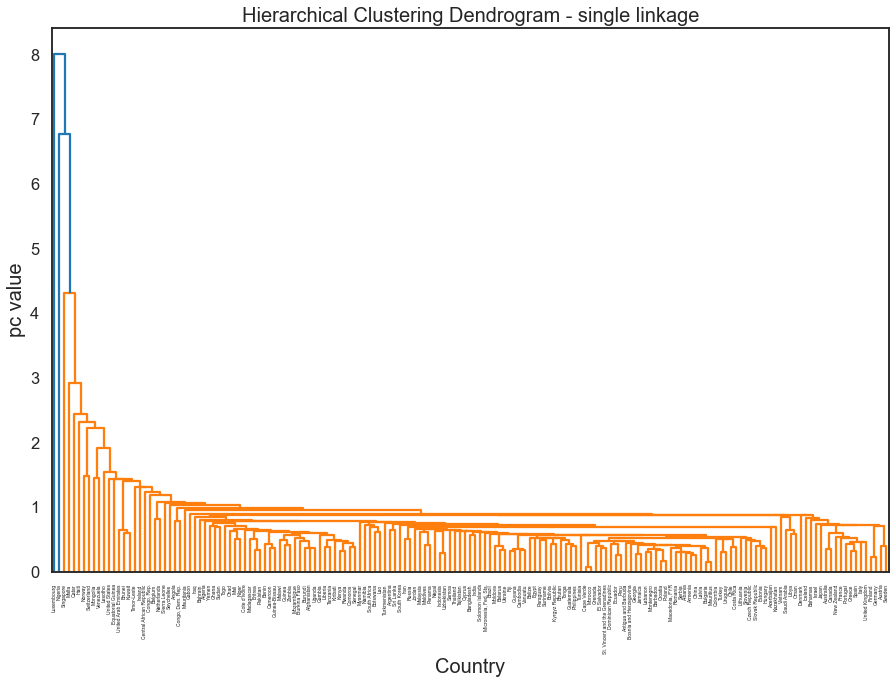

In [46]:
# First we will try with single linkage

plt.figure(figsize=(15,10))
sns.set_style('white')

plt.title('Hierarchical Clustering Dendrogram - single linkage',fontsize=20)
plt.xlabel('Country',fontsize=20)
plt.ylabel('pc value',fontsize=20)

single_linkage=linkage(hier_cluster,method='single',metric='euclidean')   # single linkage
dendrogram(single_linkage,labels=hier_cluster.index)                      # creating dendrogram
plt.show()   

##### It's not clearly visible in single linkage dendogram hence we will go for complete linkage which gives us proper results.

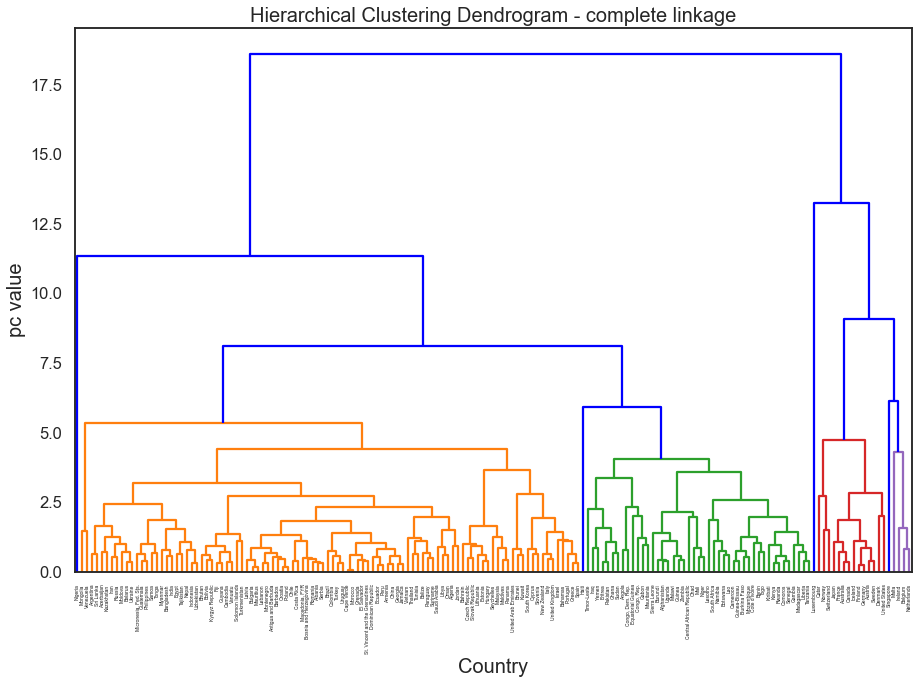

In [47]:
# Complete linkage

# setting the figure and graph style

plt.figure(figsize=(15,10))                                                                             
sns.set_style('white')                                                                                  

# setting the labels on axes and title

plt.title('Hierarchical Clustering Dendrogram - complete linkage',fontsize=20)
plt.xlabel('Country',fontsize=20)
plt.ylabel('pc value',fontsize=20)


complete_linkage=linkage(hier_cluster,method='complete',metric='euclidean')                            
dendrogram(complete_linkage,above_threshold_color='blue',color_threshold=5.5,labels=hier_cluster.index) 

plt.show()                                  

##### Taking reference from the above dendrogram we will cut in 3 clusters

In [48]:
# Applying 3 clusters

cluster_label=cut_tree(complete_linkage,n_clusters=3).reshape(-1, )  # using cut_tree for selecting number of clusters

cluster_label

array([0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0])

In [49]:
# Asssigning the cluster labels to the dataset

hier_cluster['Cluster_label']=cluster_label

hier_cluster.head()

,PC1,PC2,PC3,PC4,PC5,Cluster_label
country,,,,,,
Afghanistan,-2.740399,1.317918,-0.891229,-0.114332,0.158490,0
Albania,-0.000356,-1.491489,0.017655,0.013236,-0.216884,0
Algeria,-0.436012,-0.691619,0.693945,0.701270,0.349321,0
Angola,-2.472995,2.328570,0.882692,0.099320,0.764776,0
Antigua and Barbuda,0.641890,-1.047344,0.131177,-0.390181,0.179997,0


### Visualisation of Hierarchical clustering PC1 & PC2

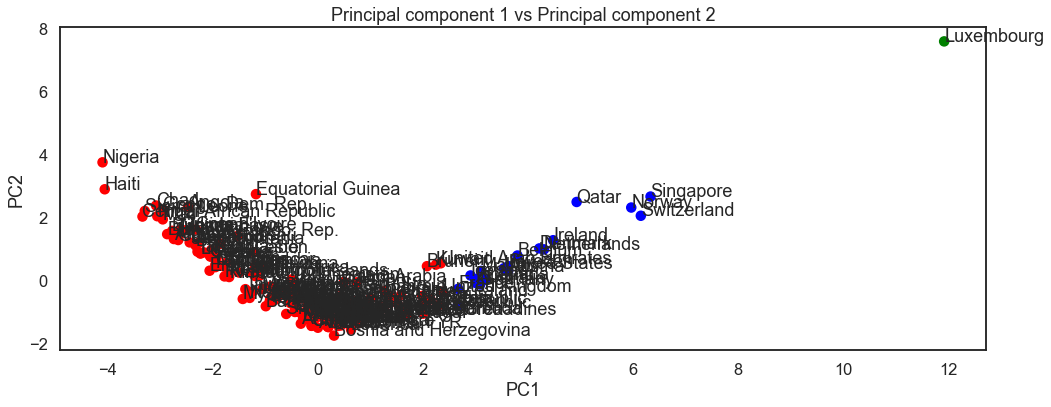

In [51]:
# Visualising the clusters formed by choosing first two pricipal components(on X-Y axes)

fig = plt.figure(figsize = (15,6))   
plt.title("Principal component 1 vs Principal component 2")

plt.scatter(hier_cluster.iloc[:,0], hier_cluster.iloc[:,1],
            c = hier_cluster.Cluster_label.map({0:'red',1:'blue',2:'green'}))

# labeling different cluster points with country names 

for i, txt in enumerate(hier_cluster.index):
    plt.annotate(txt, (hier_cluster.PC1[i],hier_cluster.PC2[i]))

plt.xlabel('PC1')
plt.ylabel('PC2')
plt.tight_layout()   
plt.show()    

###### As we can see from first two principal components(PC1 & PC2), the PC1 is in the direction where the countries need of least help. Here, why we are choosing PC1 because it has maximum percentage of variance explained. The 'Red' color datapoints of countries need help in aid but the 'Blue' one not required.

In [53]:
# Analysing cluster by comparing [gdpp,child_mort and income] - how they vary in hierarchical clustering 

# creating separate dataset for hierarchical cluster analysis
cntry_df_hier=df.drop('Cluster_id',1)    

# Imputing the new hierarchical clusters in the dataset
cntry_df_hier['Cluster_level']=cluster_label

cntry_df_hier.head()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,Cluster_level
country,,,,,,,,,,
Afghanistan,90.2,10.0,41.9174,248.297,8903.3,9.44,56.2,5.82,553,0
Albania,16.6,28.0,267.8950,1987.740,406137.0,4.49,76.3,1.65,4090,0
Algeria,27.3,38.4,185.9820,1400.440,575340.0,16.10,76.5,2.89,4460,0
Angola,119.0,62.3,100.6050,1514.370,208270.0,22.40,60.1,6.16,3530,0
Antigua and Barbuda,10.3,45.5,735.6600,7185.800,2330200.0,1.44,76.8,2.13,12200,0


### Visualization of original variables(Child mortality, Income and Gdpp)

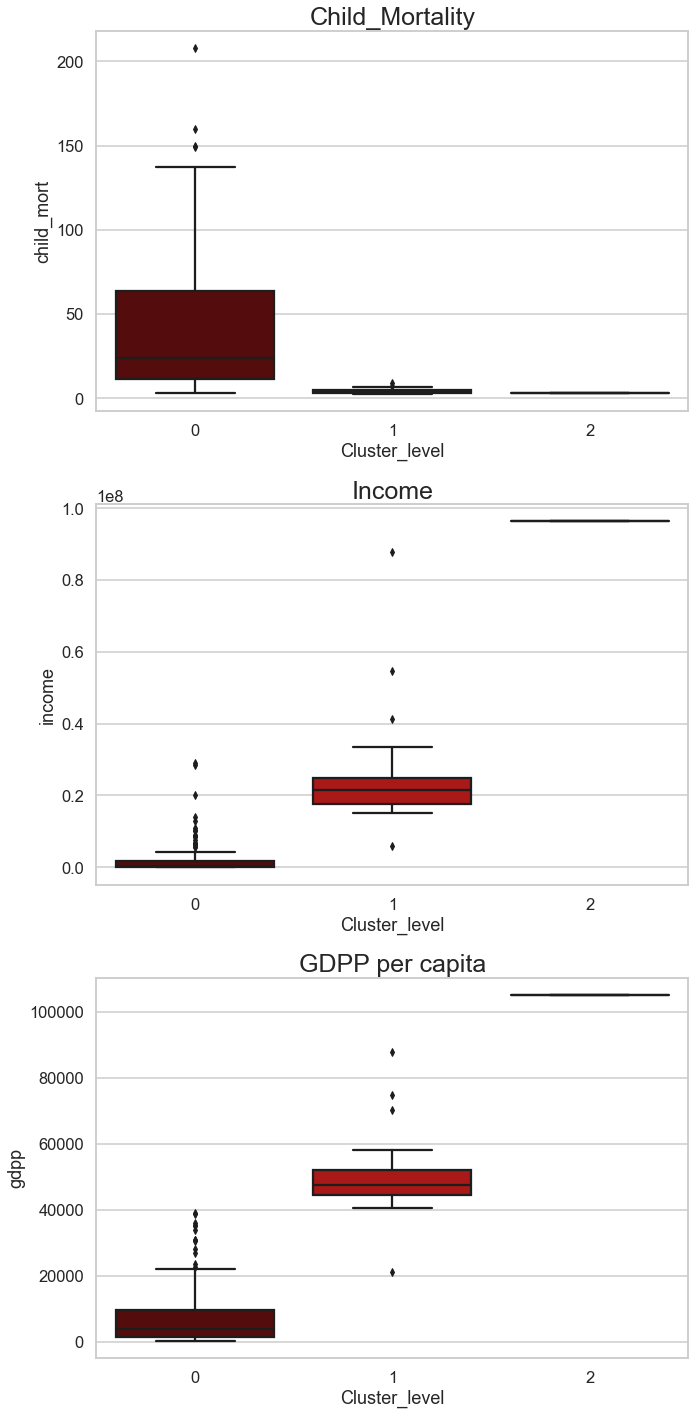

In [54]:
# Setting size of figure, context and gridlines

plt.figure(figsize=(10,20))
plt.tight_layout()
sns.set_style('whitegrid')
sns.set_context('talk')


# Visualising the outliers with boxplot for child_mort, income and gdpp variables 

plt.subplot(3,1,1)                          # creating subplots
plt.title('Child_Mortality',fontsize=25)   

sns.boxplot(x=cntry_df_hier['Cluster_level'],y=cntry_df_hier['child_mort'],data=cntry_df_hier,palette='gist_heat',
            orient='v',fliersize=5)

plt.subplot(3,1,2)                         
plt.title('Income',fontsize=25)            

sns.boxplot(x=cntry_df_hier['Cluster_level'],y=cntry_df_hier['income'],data=cntry_df_hier,palette='gist_heat',orient='v',
            fliersize=5)

plt.subplot(3,1,3)                           
plt.title('GDPP per capita',fontsize=25)       

sns.boxplot(x=cntry_df_hier['Cluster_level'],y=cntry_df_hier['gdpp'],data=cntry_df_hier,palette='gist_heat',orient='v',
            fliersize=5)
             
plt.tight_layout()                      
  


##### Valuable Insights from above three boxplots :
##### For cluster 0: gdpp and income is the lowest than other clusters, Mortality of children is very high than other clusters.
##### For cluster 1: Behaving normally in all departments(income, gdpp and children mortality) except for some outliers.
##### For cluster 2: gdpp and income is higher than other clusters, Mortality of children is very less compared to other clusters.

###  Insights(Hierarchical Approach 1)

In [55]:
# Finding the countries with cluster label=o as it shows they are not developed

Country_help_hier=pd.DataFrame(hier_cluster[hier_cluster['Cluster_label']==0].index)
Country_help_hier.shape

(147, 1)

###### There are 147 countries found from the hierarchical analysis in need of urgent help/aid as it is having lowest income, high child mortality and low gdp per capita.

## Conclusion - Approach 1
### K-Means vs Hierarchical Clustering
### K-means clustering :
###### Countries that are direst need of aid : Total 47 countries are in this category
###### Countries that are having good socio-economic and health factors : Total 2 countries are in this category - Luxembourg and Singapore
### Hierarchical clustering :
###### Countries that are direst need of aid : Total 147 countries are in this category
###### Countries that are having good socio-economic and health factors : 1 country is in this category - Luxembourg
###### We have seen from both methods - (K-Means and Hierarchical clustering) that extra 99 countries are being selected from hierarchical clustering. I would choose the final countries from k-means clustering as it gave accurate output than hierarchical clustering. I have compared the clusters and visualized from both methods and K-means gave precise information than hierarchical clustering.

# Approach 2 : Exclude outliers


In [56]:
# Removing statistical ouliers from the dataset from all the columns

new_scaled_df=scaled_df

col=['child_mort','exports','health','imports','income','inflation','life_expec','total_fer','gdpp']

# using IQR method to remove the outliers

for i in range(len(col)):
    lower=new_scaled_df[col[i]].quantile(0.05)   
    upper=new_scaled_df[col[i]].quantile(0.95)   
    IQR=upper-lower                                 
    
    # storing new dataset with removed extreme outliers
    new_scaled_df=new_scaled_df[(new_scaled_df[col[i]] >=lower - 1.5*IQR) & (new_scaled_df[col[i]] <=upper + 1.5*IQR)]


## K-Means clustering using PCA

In [57]:
# Importing incremeantal PCA for efficiency

from sklearn.decomposition import IncrementalPCA

pca_final1=IncrementalPCA(n_components=5)  # Chossing k=5 as it explains about 98% of variance - visualized from screeplot

In [58]:
# Transformation - getting data on principal components

new_pca_scaled=pca_final1.fit_transform(new_scaled_df)

new_pca_scaled.shape    

(163, 5)

<AxesSubplot:title={'center':'Correlation of the variables after PCA- countries'}>

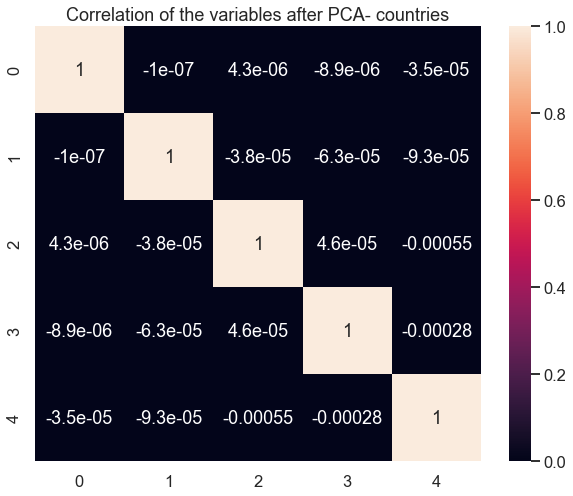

In [59]:
# Checking the correlation of the new dataset(After PCA)

corr_pca1=np.corrcoef(new_pca_scaled.transpose())

plt.figure(figsize=(10,8))        
plt.title("Correlation of the variables after PCA- countries")

sns.heatmap(corr_pca1,annot=True)   

##### From above heatmap and the calculation we can now say that we have removed the multicollinearlity from our dataset

In [60]:
# Creating new dataframe for the transformed dataset with renamed columns 

new_scaled_data=pd.DataFrame(new_pca_scaled)
new_scaled_data=new_scaled_data.rename(columns={0:'PC1',1:'PC2',2:'PC3',3:'PC4',4:'PC5',5:'PC6'})
new_scaled_data.head()

,PC1,PC2,PC3,PC4,PC5
0,-2.847871,1.144788,-0.494701,0.023511,0.236525
1,0.401720,-1.240176,-0.633937,-0.196395,-0.048374
2,-0.134213,-0.891289,-0.023847,0.881207,0.331817
3,-2.801301,1.306709,1.518211,0.998792,0.408088
4,0.890923,-0.800705,-0.028707,-0.432520,0.288040


In [ ]:
Silhouette Analysis

In [62]:
# Saving the old dataset in new dataset by reseting the index and removing the old cluster labels

cntry_df=df.reset_index()
new_cntry_df=cntry_df.iloc[new_scaled_df.index]
new_cntry_df=new_cntry_df.drop(['Cluster_id'],1)

In [64]:
# importing clustering libraries

import sklearn
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score


In [65]:
# Silhouette analysis


clusters_range=[2,3,4,5,6,7,8,9]
for i in clusters_range:
    kmeans_new=KMeans(n_clusters=i,max_iter=500)                            # Using iteration 500 for finding Kmeans
    kmeans_new.fit(new_scaled_data)                                             # fitting the kmeans
    cluster_labels=kmeans_new.labels_                                        # saving the labels in a cluster_label list
    
    silhouette_Score=silhouette_score(new_scaled_data,cluster_labels)        # finding the silhouette score 
    
    # Printing for all number of clusters of range(2,10) for silhouette score
    
    print("For no. of cluster={0},silhouette score is {1}".format(i,silhouette_Score))    

For no. of cluster=2,silhouette score is 0.3507326854603918
For no. of cluster=3,silhouette score is 0.4185703672514431
For no. of cluster=4,silhouette score is 0.31304661234671444
For no. of cluster=5,silhouette score is 0.26495100508511066
For no. of cluster=6,silhouette score is 0.28713102577739696
For no. of cluster=7,silhouette score is 0.278824137672012
For no. of cluster=8,silhouette score is 0.25445960881868124
For no. of cluster=9,silhouette score is 0.2516749607760177


In [66]:
# Now, initiating k-means clustering

# Final model k=3

kmeans_2=KMeans(n_clusters=3,max_iter=500,random_state=42)         # k=3 and iteration=500
kmeans_2.fit(new_scaled_data)                

KMeans(max_iter=500, n_clusters=3, random_state=42)

In [67]:
# New dataset cluster labels

kmeans_2.labels_ 

array([2, 0, 0, 2, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 2, 0, 0, 0, 2,
       0, 1, 0, 2, 2, 0, 2, 1, 0, 2, 2, 0, 0, 0, 2, 2, 2, 0, 2, 0, 1, 0,
       1, 0, 0, 0, 0, 2, 2, 0, 0, 1, 1, 2, 2, 0, 1, 2, 1, 0, 0, 2, 2, 0,
       2, 0, 1, 0, 0, 0, 2, 1, 1, 1, 0, 1, 0, 0, 2, 2, 1, 0, 2, 0, 0, 2,
       2, 0, 0, 0, 2, 2, 0, 0, 2, 1, 2, 0, 0, 0, 0, 0, 0, 2, 0, 2, 0, 1,
       1, 2, 1, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 2, 0, 0, 2, 0, 1,
       2, 2, 0, 1, 0, 0, 2, 0, 1, 1, 0, 2, 0, 2, 2, 0, 0, 0, 0, 2, 0, 1,
       1, 1, 0, 0, 0, 0, 0, 2, 2])

In [68]:
# Uploading the cluster labels in our original dataset

new_cntry_df['Cluster_id']=kmeans_2.labels_
new_cntry_df.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,Cluster_id
0,Afghanistan,90.2,10.0,41.9174,248.297,8903.3,9.44,56.2,5.82,553,2
1,Albania,16.6,28.0,267.8950,1987.740,406137.0,4.49,76.3,1.65,4090,0
2,Algeria,27.3,38.4,185.9820,1400.440,575340.0,16.10,76.5,2.89,4460,0
3,Angola,119.0,62.3,100.6050,1514.370,208270.0,22.40,60.1,6.16,3530,2
4,Antigua and Barbuda,10.3,45.5,735.6600,7185.800,2330200.0,1.44,76.8,2.13,12200,0


### Visualization with PC1 and PC2

In [69]:
# Data Transformation of the new_dataset

new_scaled_data['Cluster_label']=kmeans_2.labels_     # Adding cluster label to principal components

new_scaled_data.set_index(new_cntry_df.country,inplace=True)  # Adding country to the index for the new_dataset

new_scaled_data.head()

,PC1,PC2,PC3,PC4,PC5,Cluster_label
country,,,,,,
Afghanistan,-2.847871,1.144788,-0.494701,0.023511,0.236525,2
Albania,0.401720,-1.240176,-0.633937,-0.196395,-0.048374,0
Algeria,-0.134213,-0.891289,-0.023847,0.881207,0.331817,0
Angola,-2.801301,1.306709,1.518211,0.998792,0.408088,2
Antigua and Barbuda,0.890923,-0.800705,-0.028707,-0.432520,0.288040,0


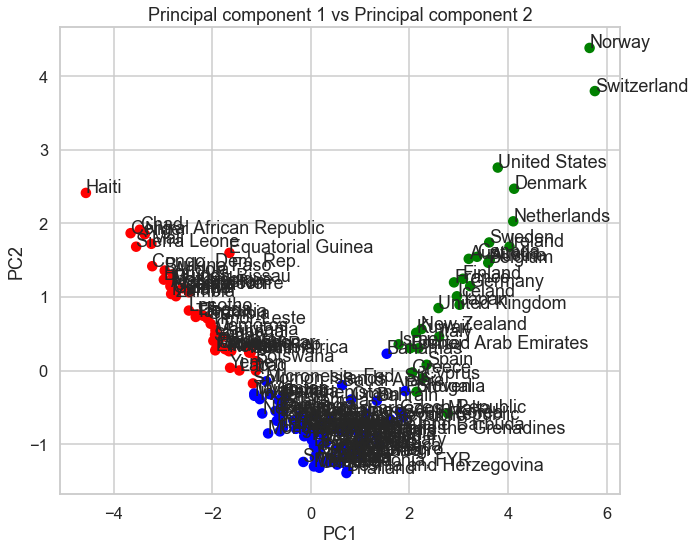

In [70]:
# Visualising the clusters formed by choosing first two pricipal components(on X-Y axes)
                
fig = plt.figure(figsize = (10,8))   

plt.title("Principal component 1 vs Principal component 2")

plt.scatter(new_scaled_data.iloc[:,0], new_scaled_data.iloc[:,1],
            c = new_scaled_data.Cluster_label.map({0:'blue',1:'green',2:'red'}))

# labeling different cluster points with country names 

for i, txt in enumerate(new_scaled_data.index):
    plt.annotate(txt, (new_scaled_data.PC1[i],new_scaled_data.PC2[i]))

plt.xlabel('PC1')
plt.ylabel('PC2')
plt.tight_layout()  
plt.show()   

##### As we can see from first two principal components(PC1 & PC2), the PC1 is in the direction where the countries need of least help. Here, why we are chossing PC1 because it has maximum percentage of variance explained. The 'Red' color datapoints of countries need urgent help in aid but the 'Blue' one not required.

### Visualisation of original variables(gdpp, income and child_mort)

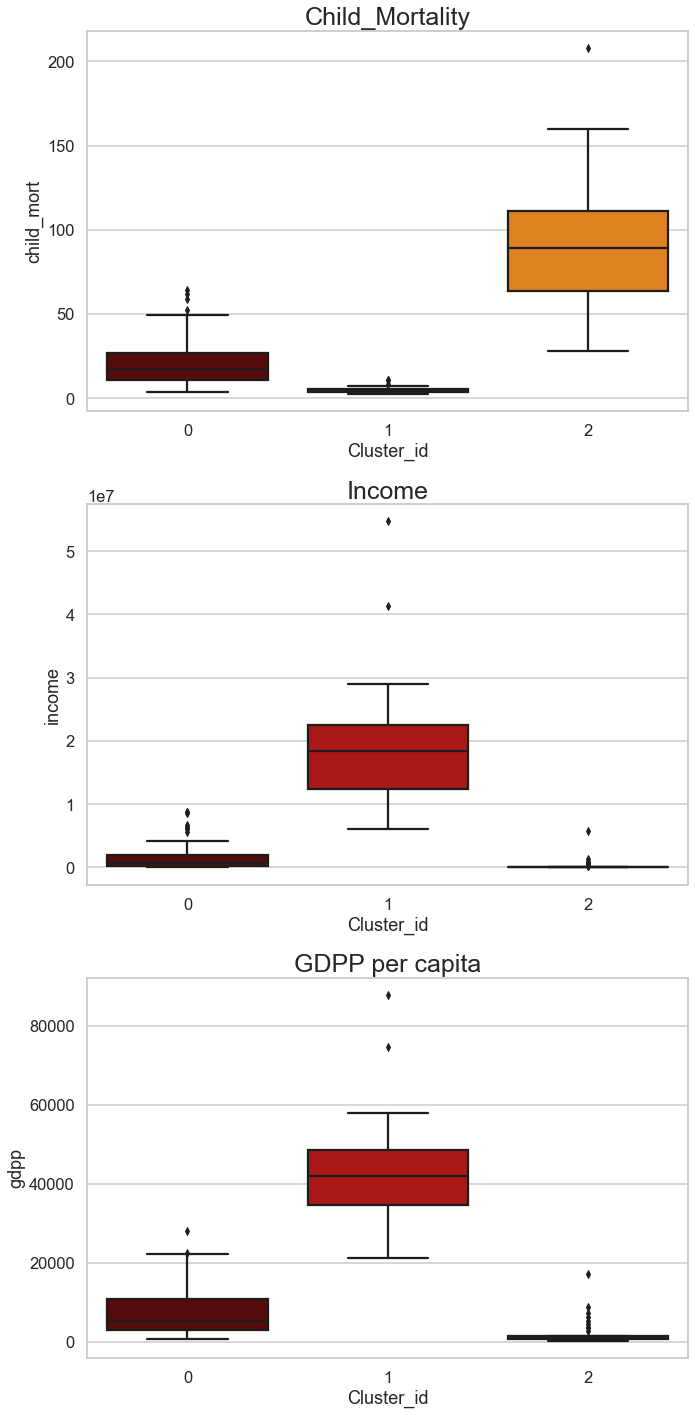

In [71]:
# Setting size of figure, context and gridlines

plt.figure(figsize=(10,20))
plt.tight_layout()
sns.set_style('whitegrid')
sns.set_context('talk')

plt.subplot(3,1,1)                          
plt.title('Child_Mortality',fontsize=25)   

sns.boxplot(x=new_cntry_df['Cluster_id'],y=new_cntry_df['child_mort'],data=new_cntry_df,palette='gist_heat',orient='v',
            fliersize=5)

plt.subplot(3,1,2)                         
plt.title('Income',fontsize=25)            

sns.boxplot(x=new_cntry_df['Cluster_id'],y=new_cntry_df['income'],data=new_cntry_df,palette='gist_heat',orient='v',fliersize=5)

plt.subplot(3,1,3)                           
plt.title('GDPP per capita',fontsize=25)       

sns.boxplot(x=new_cntry_df['Cluster_id'],y=new_cntry_df['gdpp'],data=new_cntry_df,palette='gist_heat',orient='v',fliersize=5)
             
plt.tight_layout() 

### Valuable Insights from above three boxplots :
###### For cluster 0: Having little higher gdpp and income than cluster 1 and child mortality also acts same.
###### For cluster 1: gdpp and income is higher than other clusters, Mortality of children is very less compared to other clusters.
###### For cluster 2: gdpp and income is the lowest than other clusters, Mortality of children is very high than other clusters.

## Insights (K-Means Approach 2)

In [72]:
# finding the countries with cluster label 2 as it denotes not developed countries

Country_help1=pd.DataFrame(new_scaled_data[new_scaled_data['Cluster_label']==2].index)
Country_help1.shape

(47, 1)

#### There are total 47 countries from the dataset are in need of urgent help/aid as they are having lowest income, high child mortality and low gdp per capita.

In [73]:
# Finding the countries with cluster label=3 as it denotes with developed countries

Country_nohelp1=pd.DataFrame(new_scaled_data[new_scaled_data['Cluster_label']==1].index)

Country_nohelp1.shape

(28, 1)

##### There are 28 countries having good socio-economic and health factors.

## Hierarchical Clustering

In [74]:
# Creating new dataset for hierarchical clustering by removing old cluster label

hier_cluster1=new_scaled_data.drop('Cluster_label',1)
hier_cluster1.head()

,PC1,PC2,PC3,PC4,PC5
country,,,,,
Afghanistan,-2.847871,1.144788,-0.494701,0.023511,0.236525
Albania,0.401720,-1.240176,-0.633937,-0.196395,-0.048374
Algeria,-0.134213,-0.891289,-0.023847,0.881207,0.331817
Angola,-2.801301,1.306709,1.518211,0.998792,0.408088
Antigua and Barbuda,0.890923,-0.800705,-0.028707,-0.432520,0.288040


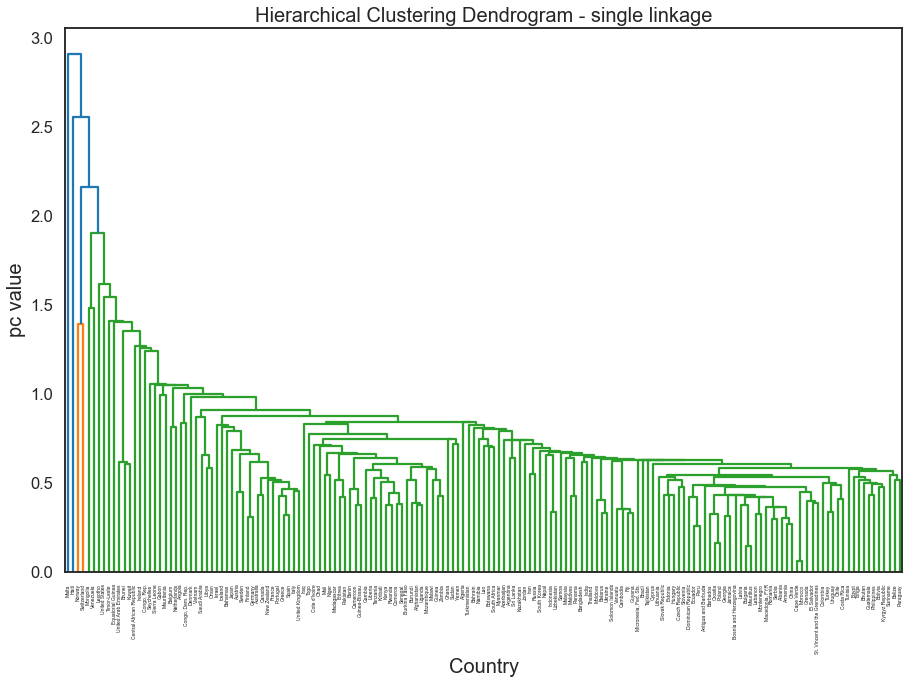

In [75]:
# First we will try with single linkage

# setting the figure and graph style

plt.figure(figsize=(15,10))
sns.set_style('white')

# setting the labels on axes and title

plt.title('Hierarchical Clustering Dendrogram - single linkage',fontsize=20)
plt.xlabel('Country',fontsize=20)
plt.ylabel('pc value',fontsize=20)

single_linkage1=linkage(hier_cluster1,method='single',metric='euclidean')   # single linkage
dendrogram(single_linkage1,labels=hier_cluster1.index)                      # creating dendrogram
plt.show() 

##### It's not clearly visible in single linkage dendogram hence we will go for complete linkage which gives us proper results.

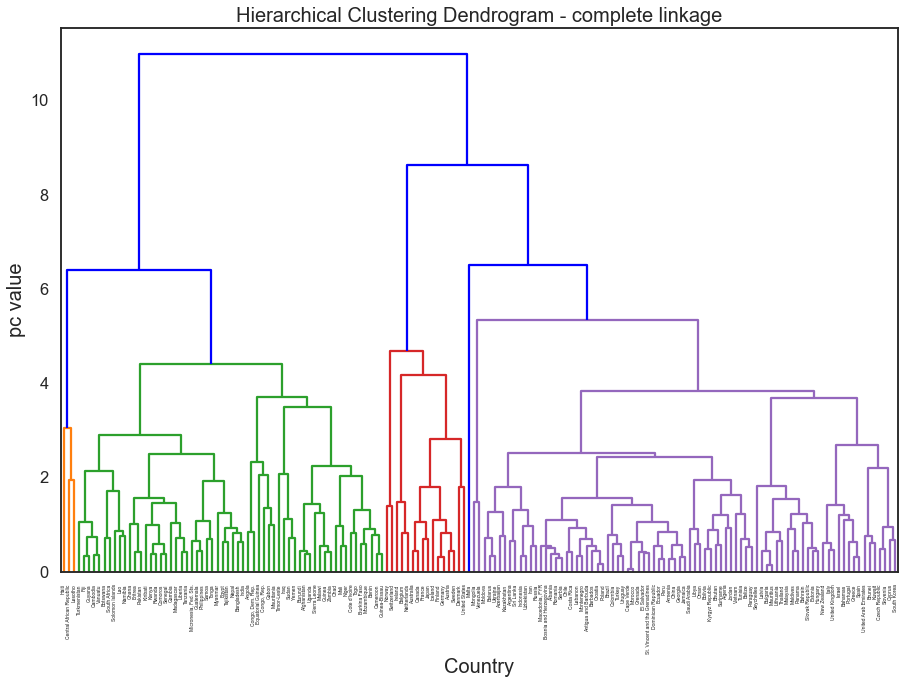

In [77]:
# Complete linkage

plt.figure(figsize=(15,10))             
sns.set_style('white')                 

plt.title('Hierarchical Clustering Dendrogram - complete linkage',fontsize=20)
plt.xlabel('Country',fontsize=20)
plt.ylabel('pc value',fontsize=20)

complete_linkage1=linkage(hier_cluster1,method='complete',metric='euclidean')                             # single linkage
dendrogram(complete_linkage1,above_threshold_color='blue',color_threshold=5.5,labels=hier_cluster1.index) # creating dendrogram

plt.show()                                                                                              

In [78]:
# 3 clusters

cluster_label1=cut_tree(complete_linkage1,n_clusters=3).reshape(-1, )

cluster_label1

array([0, 1, 1, 0, 1, 1, 1, 2, 2, 1, 1, 1, 0, 1, 1, 2, 1, 0, 1, 1, 1, 0,
       1, 1, 1, 0, 0, 0, 0, 2, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1,
       2, 1, 1, 0, 1, 0, 0, 1, 0, 2, 2, 0, 0, 1, 2, 0, 1, 1, 0, 0, 0, 0,
       0, 1, 2, 0, 1, 1, 0, 2, 1, 1, 1, 2, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0,
       0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 2,
       1, 0, 2, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1,
       0, 0, 1, 1, 1, 1, 0, 1, 2, 2, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1,
       1, 2, 1, 1, 0, 1, 1, 0, 0])

In [79]:
# Asssigning the cluster labels to the dataset(countries)

hier_cluster1['Cluster_label']=cluster_label1

hier_cluster1.head()

,PC1,PC2,PC3,PC4,PC5,Cluster_label
country,,,,,,
Afghanistan,-2.847871,1.144788,-0.494701,0.023511,0.236525,0
Albania,0.401720,-1.240176,-0.633937,-0.196395,-0.048374,1
Algeria,-0.134213,-0.891289,-0.023847,0.881207,0.331817,1
Angola,-2.801301,1.306709,1.518211,0.998792,0.408088,0
Antigua and Barbuda,0.890923,-0.800705,-0.028707,-0.432520,0.288040,1


### Visualising the original variables for hierarchical clustering - Approach 2

In [81]:
# Analysing cluster by comparing [gdpp,child_mort and income] - how they vary in hierarchical clustering 

cntry_df_hier1=new_cntry_df.drop('Cluster_id',1)    # creating separate dataset for hierarchical cluster analysis

# Imputing the new hierarchical clusters in the dataset

cntry_df_hier1['Cluster_level']=cluster_label1

cntry_df_hier1.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,Cluster_level
0,Afghanistan,90.2,10.0,41.9174,248.297,8903.3,9.44,56.2,5.82,553,0
1,Albania,16.6,28.0,267.8950,1987.740,406137.0,4.49,76.3,1.65,4090,1
2,Algeria,27.3,38.4,185.9820,1400.440,575340.0,16.10,76.5,2.89,4460,1
3,Angola,119.0,62.3,100.6050,1514.370,208270.0,22.40,60.1,6.16,3530,0
4,Antigua and Barbuda,10.3,45.5,735.6600,7185.800,2330200.0,1.44,76.8,2.13,12200,1


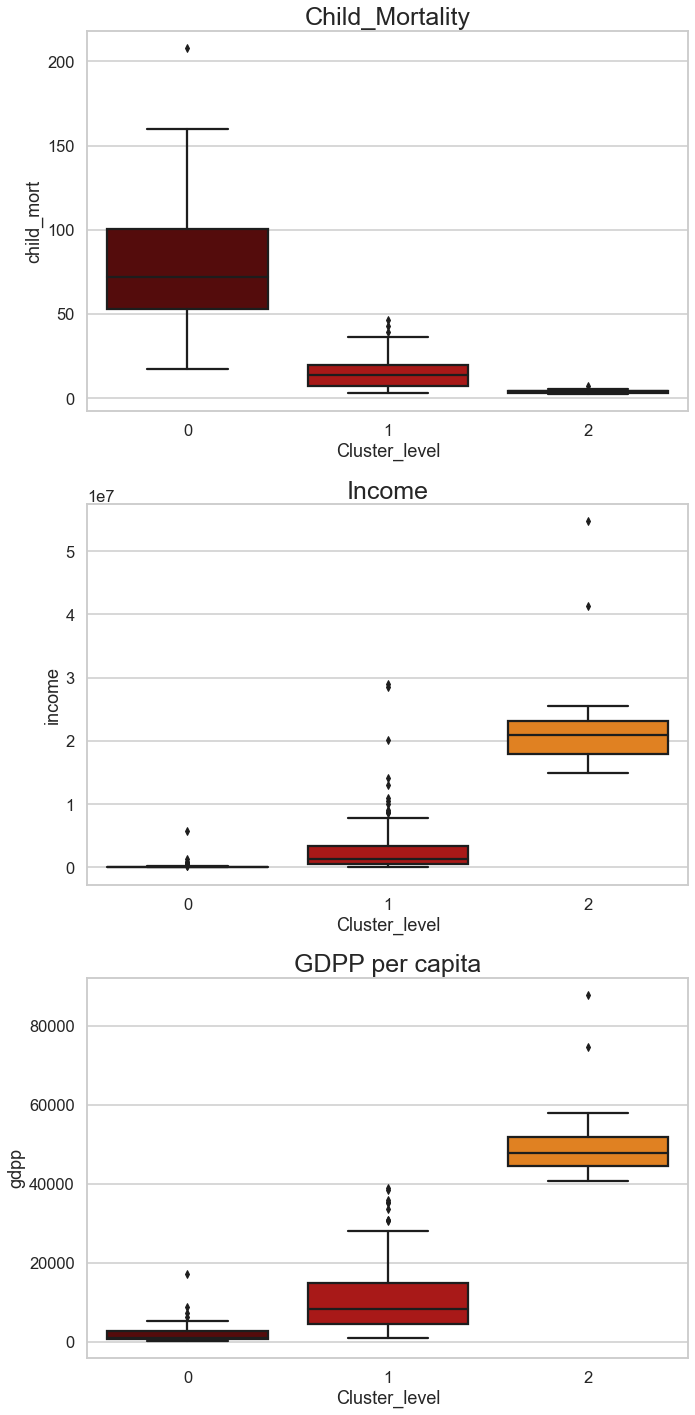

In [82]:
# Setting size of figure, context and gridlines

plt.figure(figsize=(10,20))
plt.tight_layout()
sns.set_style('whitegrid')
sns.set_context('talk')


# Visualising the outliers with boxplot for child_mort, income and gdpp variables 

plt.subplot(3,1,1)                         
plt.title('Child_Mortality',fontsize=25)   

sns.boxplot(x=cntry_df_hier1['Cluster_level'],y=cntry_df_hier1['child_mort'],data=cntry_df_hier1,palette='gist_heat',
            orient='v',fliersize=5)

plt.subplot(3,1,2)                         
plt.title('Income',fontsize=25)            

sns.boxplot(x=cntry_df_hier1['Cluster_level'],y=cntry_df_hier1['income'],data=cntry_df_hier1,palette='gist_heat',
            orient='v',fliersize=5)

plt.subplot(3,1,3)                           
plt.title('GDPP per capita',fontsize=25)       

sns.boxplot(x=cntry_df_hier1['Cluster_level'],y=cntry_df_hier1['gdpp'],data=cntry_df_hier1,palette='gist_heat',
            orient='v',fliersize=5)
             
plt.tight_layout()                      
  


### Valuable Insights from above three boxplots :
##### For cluster 0: .gdpp and income is the lowest than others clusters, Mortality of children is very high than other clusters.
##### For cluster 1: gdpp and income is having decent low value, mortality of children is high in here, the 4th quartile is larger than others
##### For cluster 2: gdpp and income is higher than others clusters, Mortality of children is very less compared to other clusters


## Visualising the PC1 and PC2 for hierarchical clustering - Approach 2

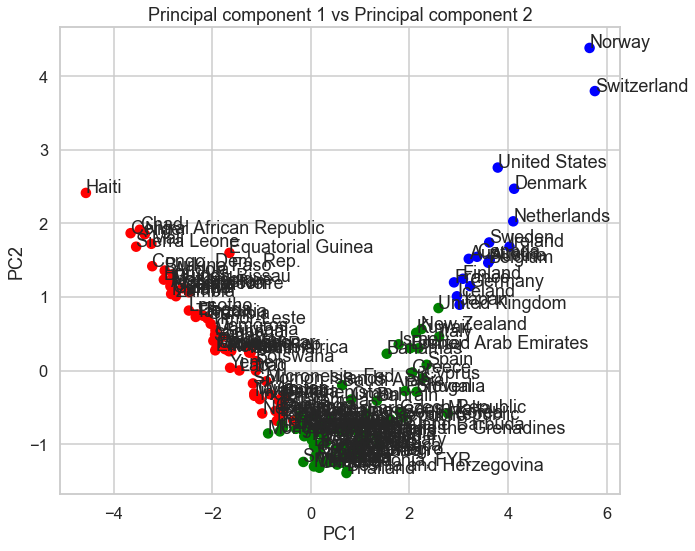

In [83]:
# Visualising the clusters formed by choosing first two pricipal components(on X-Y axes)
                 
fig = plt.figure(figsize = (10,8))   

plt.title("Principal component 1 vs Principal component 2")

plt.scatter(hier_cluster1.iloc[:,0], hier_cluster1.iloc[:,1],
            c = hier_cluster1.Cluster_label.map({0:'red',1:'green',2:'blue'}))

for i, txt in enumerate(hier_cluster1.index):
    plt.annotate(txt, (hier_cluster1.PC1[i],hier_cluster1.PC2[i]))

plt.xlabel('PC1')
plt.ylabel('PC2')
plt.tight_layout()   
plt.show()

#### As we can see from first two principal components(PC1 & PC2), the PC1 is in the direction where the countries need of least help. Here, why we are choosing PC1 because it has maximum percentage of variance explained. The 'Red' color datapoints of countries need urgent help in aid but the 'Blue' one not required.

## Insights - (Hierarchical Approach 2)

In [84]:
# Finding the countries with cluster label=0

Country_help_hier1=pd.DataFrame(hier_cluster1[hier_cluster1['Cluster_label']==0].index)
Country_help_hier1.shape

(63, 1)

#### Here, we got 63 countries which are in need of aid as they have having low income, high child mortality and low gdp per capita.

In [85]:
# Finding the countries with cluster label=2

Country_nohelp_hier1=pd.DataFrame(hier_cluster1[hier_cluster1['Cluster_label']==2].index)
Country_nohelp_hier1.shape

(16, 1)

#### Here, we got 16 countries which are having good social-economic and health factors.

## Conclusion - Approach 2
### K-Means vs Hierarchical Clustering
### K-means clustering :

Countries that are direst need of aid: Total 47 countries are in this category

### Hierarchical clustering :

Countries that are direst need of aid : Total 63 countries are in this category

#### We have seen from both methods - (K-Means and Hierarchical clustering) that extra 9 countries are adding through hierarchical clustering. I would choose the final countries from hierarchical clustering as it gave accurate output than k-means clustering. I have compared the clusters and visualized from both methods and hierarchical clustering gave precise information than K-Means clustering.

## Final Conclusion
Among the two conclusion drawn from approach 1 i.e. including ouliers and approach 2 i.e. excluding outliers, approach 1 is the appropriate choice because it includes all the data points including outliers. As per the business requirements, we have to find all the countries which are in direst need of aid i.e. the countries which are having low socio-economic and health factors. Hence we can't exclude any countries from our dataset as it will create a major drawback in our model. For example: let's take an outlier country 'Nigeria' which is having low socio-economic and health factors. If we exclude this outlier from my dataset, we will miss our main objective as it happened with approach 2. So, even though the model was greater than the previous model, we can't use it as it doesn't suits the business needs. Selecting approach 2 means we have to loose many countries in process which is not ideal from business prespective.

#### The final list of 47 countries name needs to focus on the most are mentioned below :